<a href="https://colab.research.google.com/github/phqsuema123/Fundamental_Data_Science/blob/main/Mathematical_and_Statistical_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Amazon Customer Behavior Survey**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

**Import Dataset**

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Amazon Customer Behavior Survey.csv")
df=df1

In [ ]:
df.head(5)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


**Explore Data**

In [ ]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

'การประทับเวลา', 'อายุ', 'เพศ', 'ความถี่ในการซื้อ',
 'หมวดหมู่การซื้อ', 'คำแนะนำส่วนบุคคล_ความถี่',
 'การเรียกดู_ความถี่', 'Product_Search_Method',
 'Search_Result_Exploration', 'ลูกค้า_รีวิว_ความสำคัญ',
 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'รีวิว_ซ้าย',
 'รีวิว_ความน่าเชื่อถือ', 'รีวิว_ความช่วยเหลือ',
 'คำแนะนำส่วนบุคคล_ความถี่', 'คำแนะนำ_ความช่วยเหลือ',
 'Rating_Accuracy', 'Shopping_Satisfaction', 'Service_Appreciation',
 'การปรับปรุง_พื้นที่'

In [ ]:
df.shape

(602, 23)

In [ ]:
df.isnull().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,2
Search_Result_Exploration,0
Customer_Reviews_Importance,0


data is null in column Product_Search_Method                     2

In [ ]:
columns_to_check = ['Product_Search_Method']
filtered_df = df[df[columns_to_check].isnull().any(axis=1)]
print("Rows where columns have null values:")
filtered_df


Rows where columns have null values:


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
119,2023/06/06 2:07:12 PM GMT+5:30,21,Female,Once a month,Clothing and Fashion,Sometimes,Few times a week,NaN,Multiple pages,3,...,Often,No,Moderately,Sometimes,3,Sometimes,3,3,User-friendly website/app interface,Customer service responsiveness
382,2023/06/08 5:49:59 PM GMT+5:30,47,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,No,Multiple times a day,NaN,Multiple pages,1,...,Often,No,Moderately,No,2,No,3,2,Wide product selection,Shipping speed and reliability


In [ ]:
df.dtypes

,0
Timestamp,object
age,int64
Gender,object
Purchase_Frequency,object
Purchase_Categories,object
Personalized_Recommendation_Frequency,object
Browsing_Frequency,object
Product_Search_Method,object
Search_Result_Exploration,object
Customer_Reviews_Importance,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [ ]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


**Add index**

In [ ]:
df['index'] = df.index

In [ ]:
df=df[['index','Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas']]

In [ ]:
df.head(3)

,index,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy


**drop columns and drop data is null**

In [ ]:
df.drop(['Timestamp'],inplace=True,axis=1)
df

<ipython-input-14-9e03a6aebc5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Timestamp'],inplace=True,axis=1)


,index,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,598,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,599,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,600,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
index,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,0
Search_Result_Exploration,0
Customer_Reviews_Importance,0


**Grouping**

In [ ]:
def gender_gr(gender):
    if gender == 'Female':
        return "Female"
    elif gender == 'Male':
        return "Male"
    else:
        return "Other"


df['Gender_Gr'] = df['Gender'].apply(gender_gr)

<ipython-input-17-731140623ebc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender_Gr'] = df['Gender'].apply(gender_gr)


In [ ]:
def group_frequency(frequency):
    if frequency in ['Multiple times a week', 'Once a week']:
        return 'Frequent'
    elif frequency in ['Few times a month', 'Once a month']:
        return 'Moderate'
    elif frequency == 'Less than once a month':
        return 'Rare'
    else:
        return 'Unknown'
df['Frequency_Gr'] = df['Purchase_Frequency'].apply(group_frequency)

<ipython-input-18-56777822e4b0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency_Gr'] = df['Purchase_Frequency'].apply(group_frequency)


In [ ]:
def group_categories(categories):
    categories_list = categories.split(';')

    if 'Groceries and Gourmet Food' in categories_list:
        return 'Groceries and Gourmet Food'
    elif 'Beauty and Personal Care' in categories_list:
        return 'Beauty and Personal Care'
    elif 'Clothing and Fashion' in categories_list:
        return 'Clothing and Fashion'
    elif 'Home and Kitchen' in categories_list:
        return 'Home and Kitchen'
    else:
        return 'Others'
df['Main_Category'] = df['Purchase_Categories'].apply(group_categories)

<ipython-input-19-88b94f456c39>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Main_Category'] = df['Purchase_Categories'].apply(group_categories)


In [ ]:
df['Gr_Personalized_Recommendation_Frequency'] = df['Personalized_Recommendation_Frequency'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

print(df['Gr_Personalized_Recommendation_Frequency'].unique())

['Yes' 'No']


<ipython-input-20-82461093ff53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gr_Personalized_Recommendation_Frequency'] = df['Personalized_Recommendation_Frequency'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')


In [ ]:
def group_browsing_frequency(frequency):
    if frequency in ['Multiple times a day', 'Few times a week']:
        return 'Frequent'
    elif frequency == 'Few times a month':
        return 'Moderate'
    elif frequency == 'Rarely':
        return 'Rare'
    else:
        return 'Unknown'

# Apply the grouping function
df['Browsing_Frequency_Gr'] = df['Browsing_Frequency'].apply(group_browsing_frequency)

<ipython-input-21-4f5095dcb147>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Browsing_Frequency_Gr'] = df['Browsing_Frequency'].apply(group_browsing_frequency)


In [ ]:
df["Add_to_Cart_Browsing_gr"] = df['Add_to_Cart_Browsing'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

<ipython-input-22-8a2e072627c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Add_to_Cart_Browsing_gr"] = df['Add_to_Cart_Browsing'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')


In [ ]:
def group_cart_completion_frequency(frequency):
    if frequency in ['Always', 'Often']:
        return 'High'
    elif frequency == 'Sometimes':
        return 'Medium'
    elif frequency in ['Rarely', 'Never']:
        return 'Low'
    else:
        return 'Unknown'

# Apply the grouping function
df['Cart_Completion_Frequency_Gr'] = df['Cart_Completion_Frequency'].apply(group_cart_completion_frequency)

<ipython-input-23-6f124f9b995f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cart_Completion_Frequency_Gr'] = df['Cart_Completion_Frequency'].apply(group_cart_completion_frequency)


In [ ]:
def group_abandonment_factors(factor):
    if factor in ['Found a better price elsewhere', 'High shipping costs']:
        return 'Price-related'
    elif factor == 'Changed my mind or no longer need the item':
        return 'Decision-related'
    else:
        return 'Other'

# Apply the grouping function
df['Abandonment_Gr'] = df['Cart_Abandonment_Factors'].apply(group_abandonment_factors)

<ipython-input-24-aca247e97d66>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abandonment_Gr'] = df['Cart_Abandonment_Factors'].apply(group_abandonment_factors)


In [ ]:
def group_save_for_later_frequency(frequency):
    if frequency in ['Always', 'Often']:
        return 'High'
    elif frequency == 'Sometimes':
        return 'Medium'
    elif frequency in ['Rarely', 'Never']:
        return 'Low'
    else:
        return 'Unknown'

# Apply the grouping function
df['Saveforlater_Frequency_Gr'] = df['Saveforlater_Frequency'].apply(group_save_for_later_frequency)


<ipython-input-25-9d6ce1d4bf05>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Saveforlater_Frequency_Gr'] = df['Saveforlater_Frequency'].apply(group_save_for_later_frequency)


In [ ]:
df['Review_Helpfulness_gr'] = df['Review_Helpfulness'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

<ipython-input-26-178b00364786>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review_Helpfulness_gr'] = df['Review_Helpfulness'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')


In [ ]:
df['Recommendation_Helpfulness_gr'] = df['Recommendation_Helpfulness'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

<ipython-input-27-7dec8168fd33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recommendation_Helpfulness_gr'] = df['Recommendation_Helpfulness'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')


In [ ]:
df.to_excel('data1111.xlsx', index=False)

**Plot**

<Axes: >

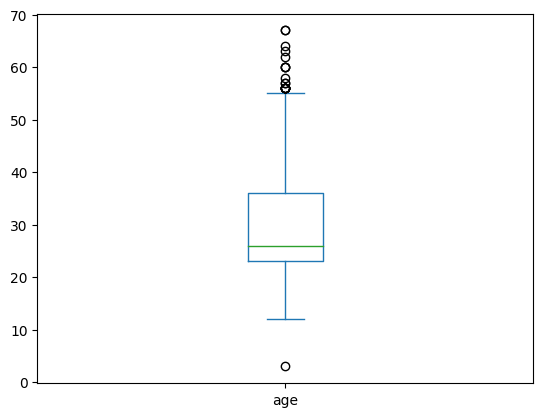

In [ ]:
df['age'].plot.box()

<Axes: >

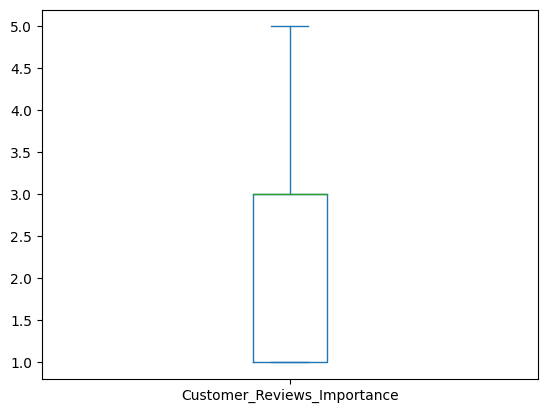

In [ ]:
df['Customer_Reviews_Importance'].plot.box()

<Axes: >

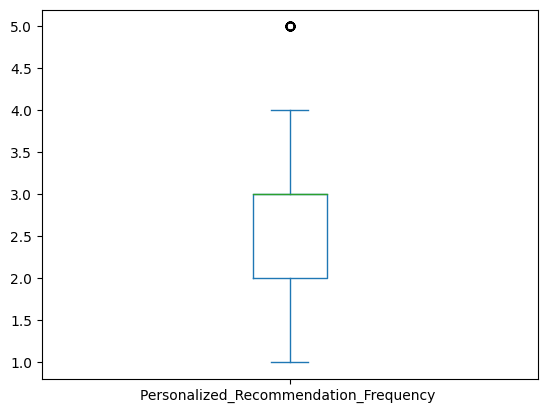

In [ ]:
df['Personalized_Recommendation_Frequency '].plot.box()

<Axes: >

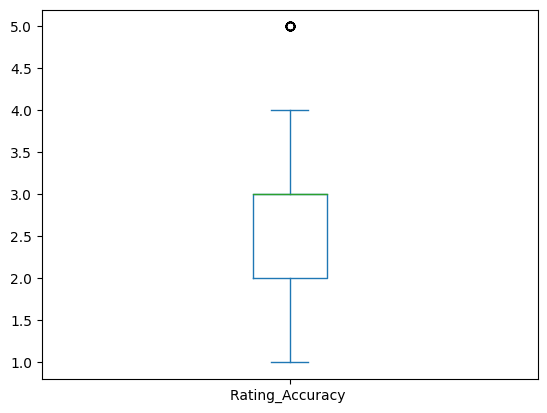

In [ ]:
df['Rating_Accuracy '].plot.box()

<Axes: >

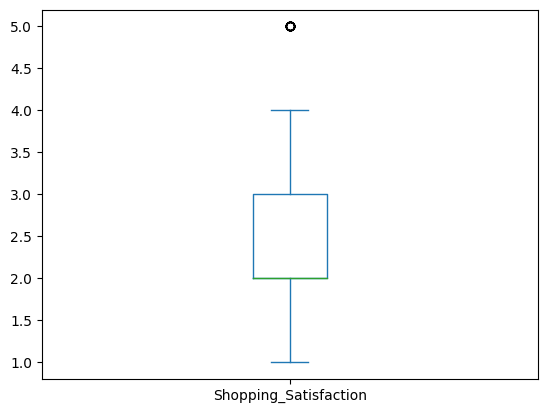

In [ ]:
df['Shopping_Satisfaction'].plot.box()

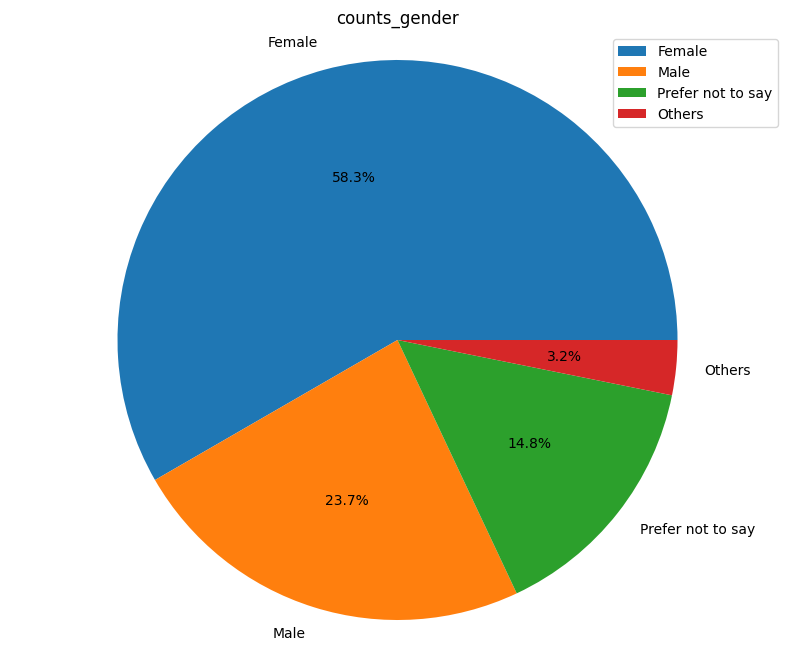

In [ ]:
counts_gender= df['Gender'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_gender, labels=counts_gender.index, autopct='%1.1f%%')
plt.title('counts_gender')
plt.axis('equal')
plt.legend()
plt.show()

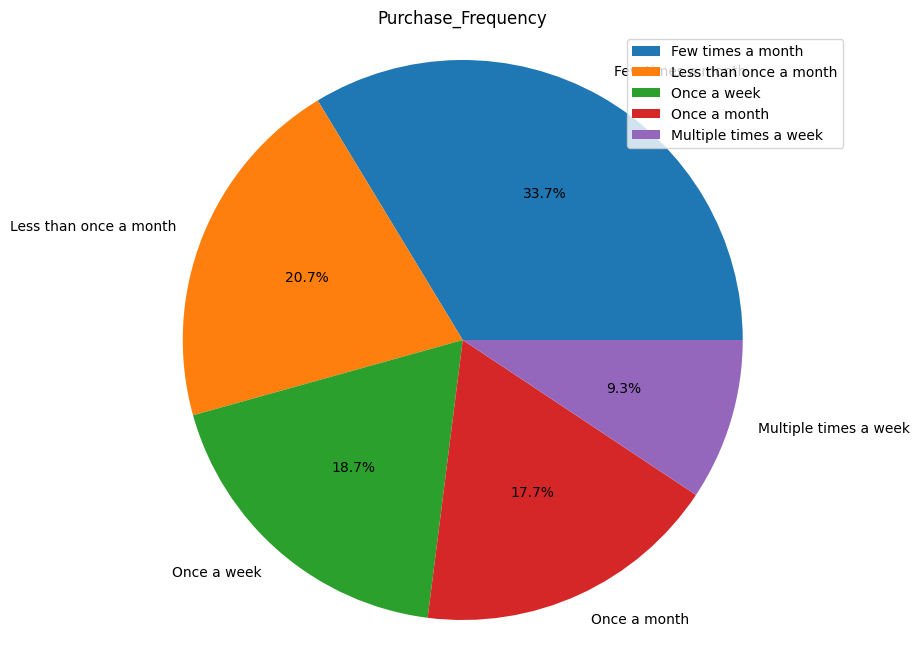

In [ ]:
counts_Purchase_Frequency= df['Purchase_Frequency'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(counts_Purchase_Frequency, labels=counts_Purchase_Frequency.index, autopct='%1.1f%%')
plt.title('Purchase_Frequency')
plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
df['Purchase_Frequency'].head(5)

,Purchase_Frequency
0,Few times a month
1,Once a month
2,Few times a month
3,Once a month
4,Less than once a month


<ipython-input-37-f11d6840884c>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


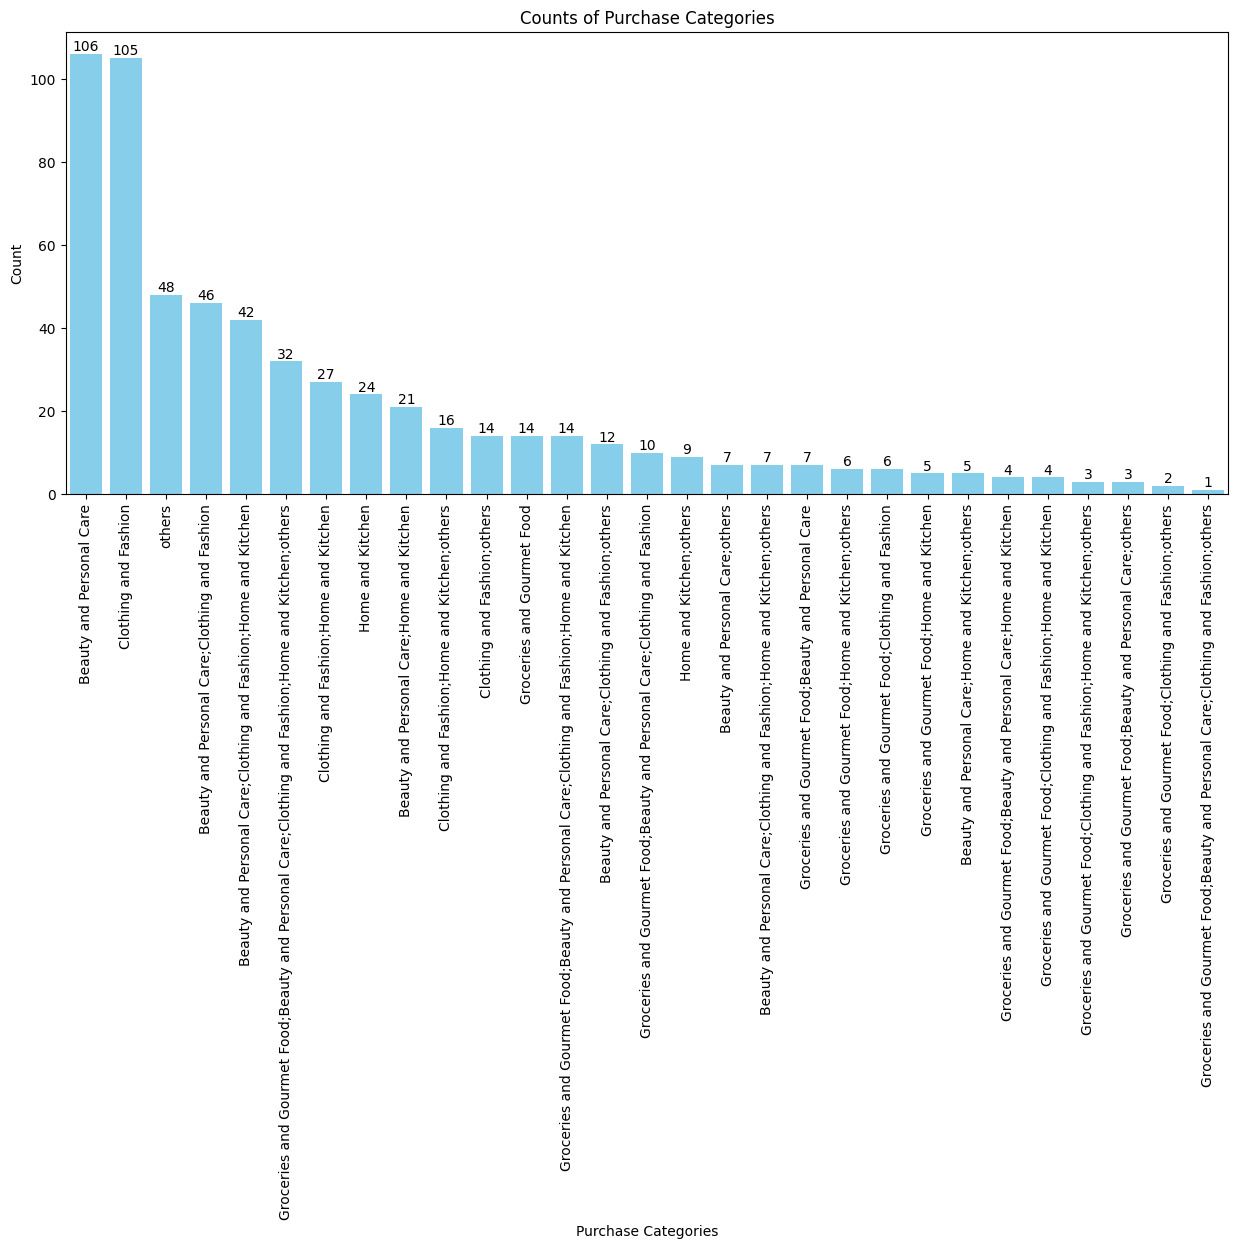

In [ ]:
counts_Purchase_Categories= df['Purchase_Categories'].value_counts()
plt.figure(figsize=(15, 6))
barplot = plt.bar(counts_Purchase_Categories.index, counts_Purchase_Categories, color='skyblue')
counts_Purchase_Categories.plot(kind='bar', color='skyblue')

plt.xlabel('Purchase Categories')
plt.ylabel('Count')
plt.title('Counts of Purchase Categories')

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

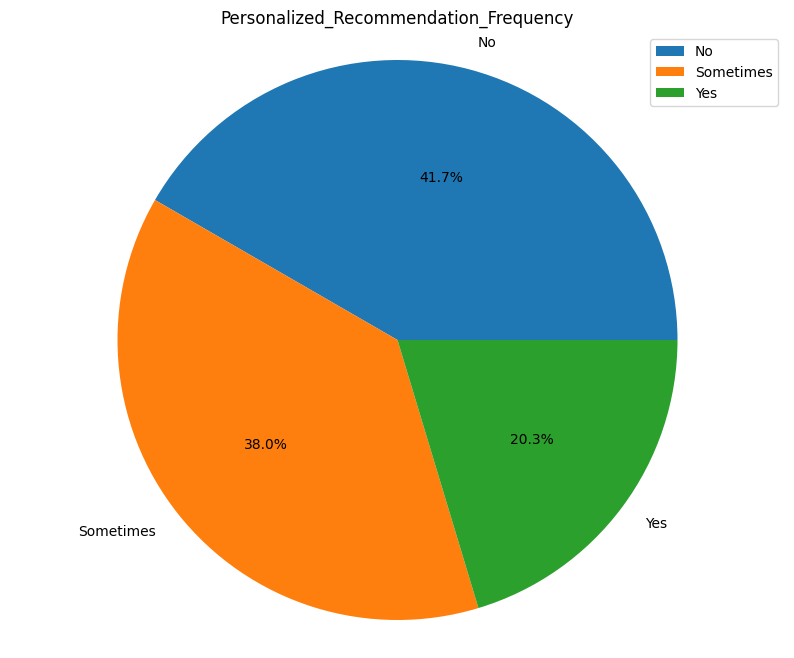

In [ ]:
counts_Personalized_Recommendation_Frequency= df['Personalized_Recommendation_Frequency'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Personalized_Recommendation_Frequency, labels=counts_Personalized_Recommendation_Frequency.index, autopct='%1.1f%%')
plt.title('Personalized_Recommendation_Frequency')
plt.axis('equal')
plt.legend()
plt.show()

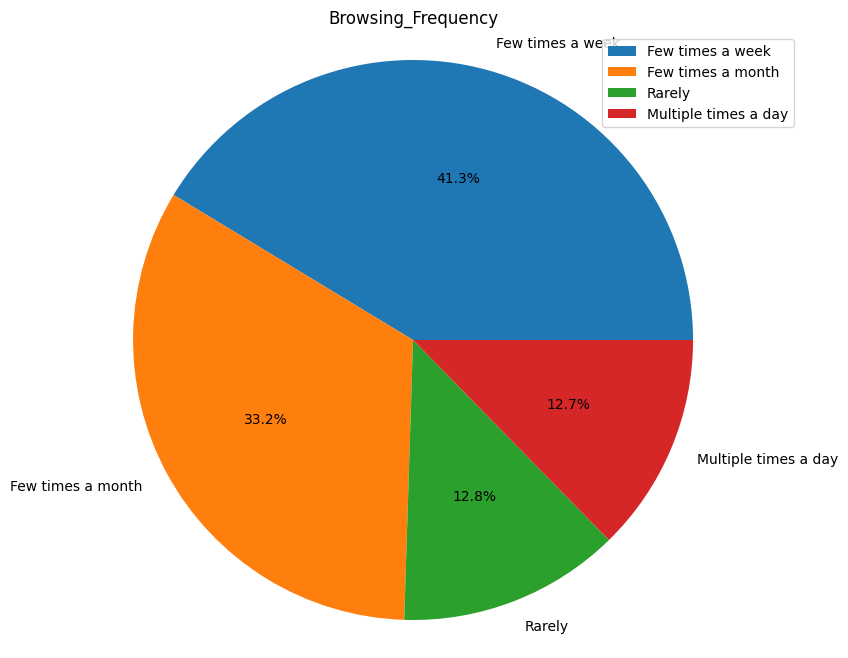

In [ ]:
counts_Browsing_Frequency= df['Browsing_Frequency'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Browsing_Frequency, labels=counts_Browsing_Frequency.index, autopct='%1.1f%%')
plt.title('Browsing_Frequency')
plt.axis('equal')
plt.legend()
plt.show()

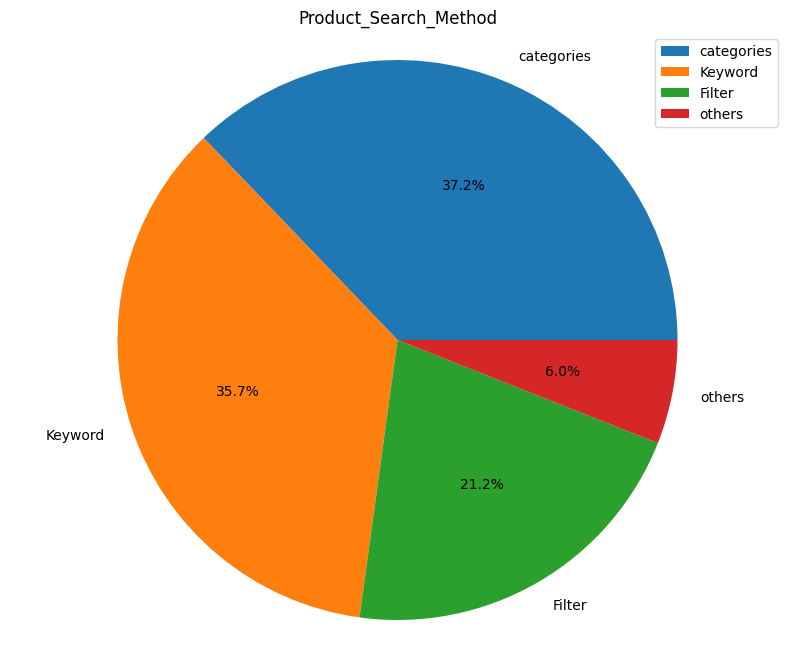

In [ ]:
counts_Product_Search_Method= df['Product_Search_Method'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Product_Search_Method, labels=counts_Product_Search_Method.index, autopct='%1.1f%%')
plt.title('Product_Search_Method')
plt.axis('equal')
plt.legend()
plt.show()

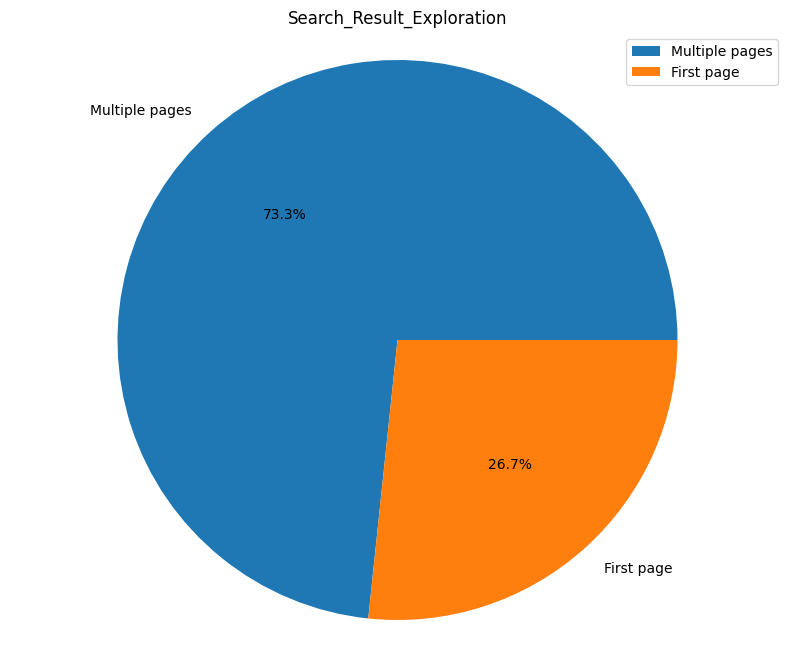

In [ ]:
counts_Search_Result_Exploration= df['Search_Result_Exploration'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Search_Result_Exploration, labels=counts_Search_Result_Exploration.index, autopct='%1.1f%%')
plt.title('Search_Result_Exploration')
plt.axis('equal')
plt.legend()
plt.show()

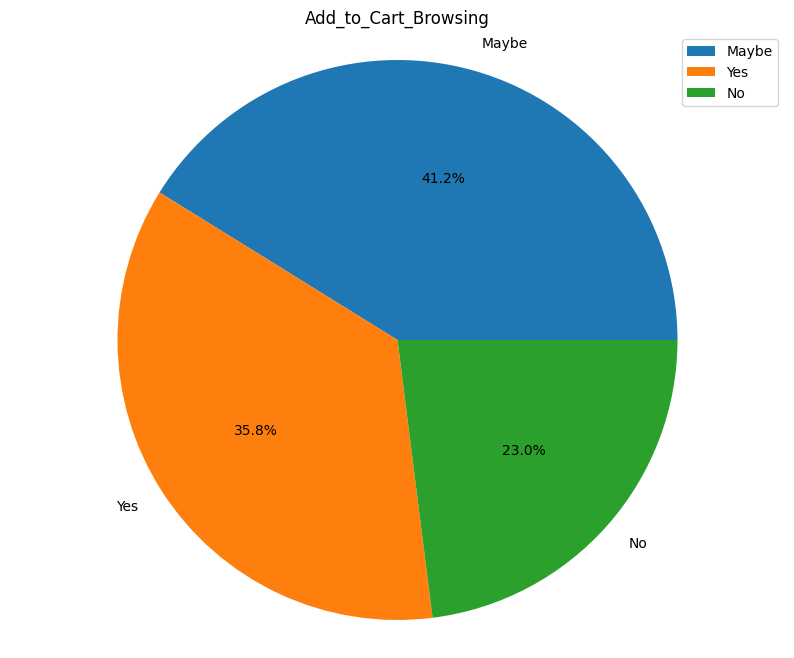

In [ ]:
counts_Add_to_Cart_Browsing= df['Add_to_Cart_Browsing'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Add_to_Cart_Browsing, labels=counts_Add_to_Cart_Browsing.index, autopct='%1.1f%%')
plt.title('Add_to_Cart_Browsing')
plt.axis('equal')
plt.legend()
plt.show()

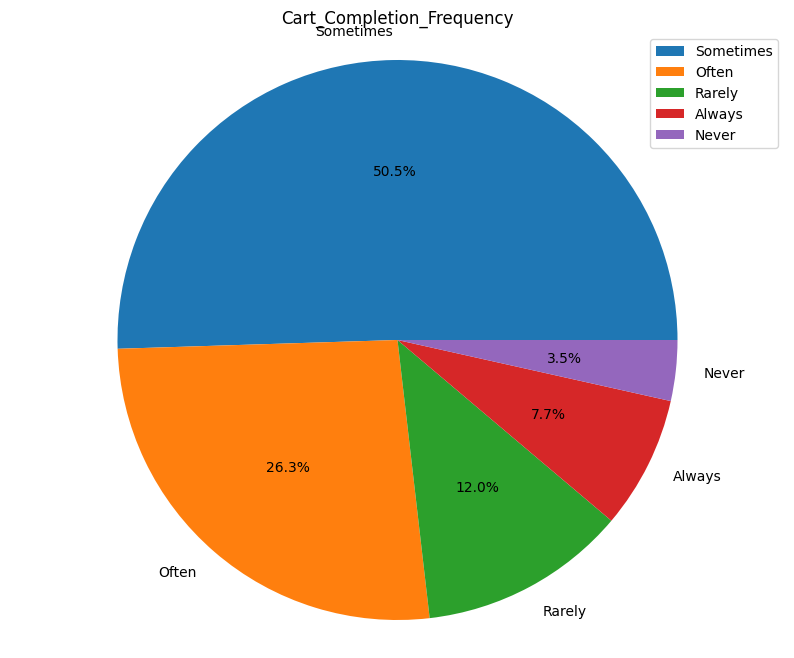

In [ ]:
counts_Cart_Completion_Frequency= df['Cart_Completion_Frequency'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Cart_Completion_Frequency, labels=counts_Cart_Completion_Frequency.index, autopct='%1.1f%%')
plt.title('Cart_Completion_Frequency')
plt.axis('equal')
plt.legend()
plt.show()

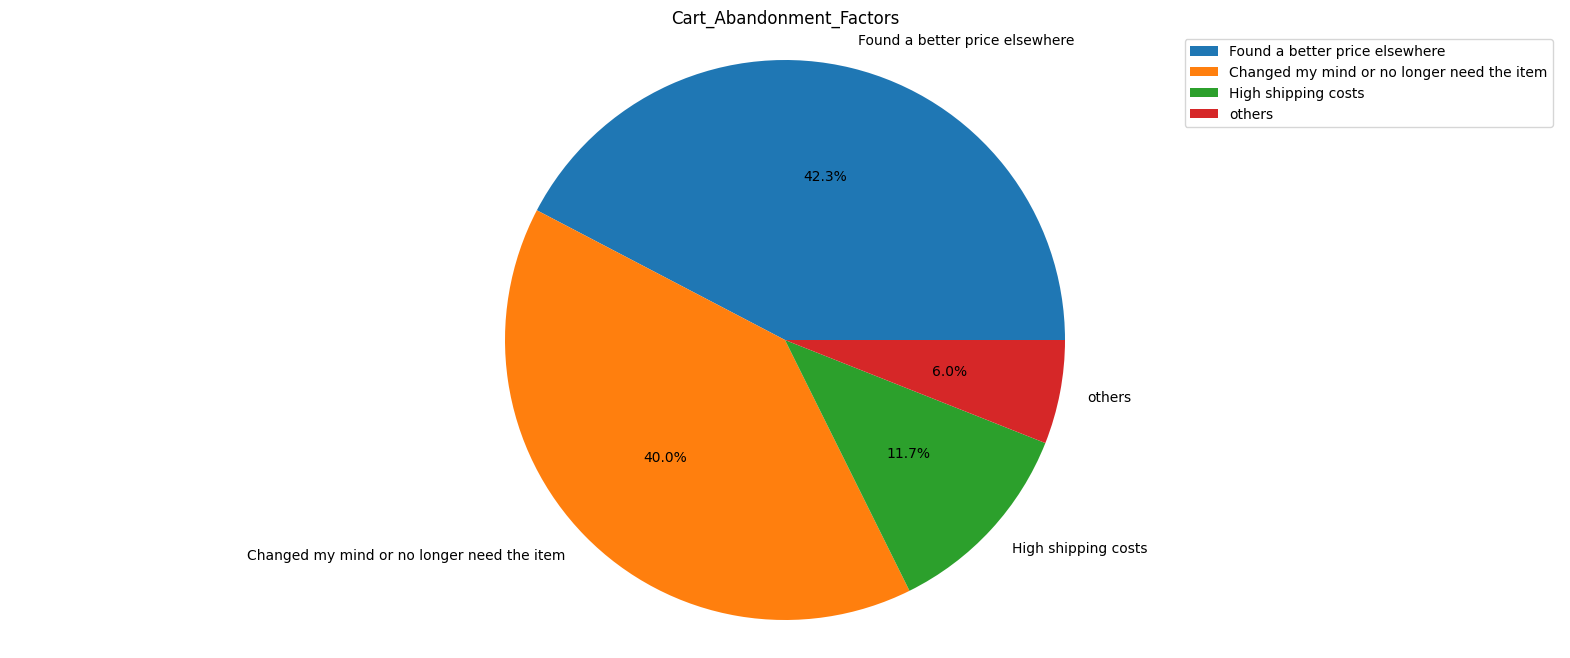

In [ ]:
counts_Cart_Abandonment_Factors= df['Cart_Abandonment_Factors'].value_counts()
plt.figure(figsize=(20, 8))
plt.pie(counts_Cart_Abandonment_Factors, labels=counts_Cart_Abandonment_Factors.index, autopct='%1.1f%%')
plt.title('Cart_Abandonment_Factors')
plt.axis('equal')
plt.legend()
plt.show()

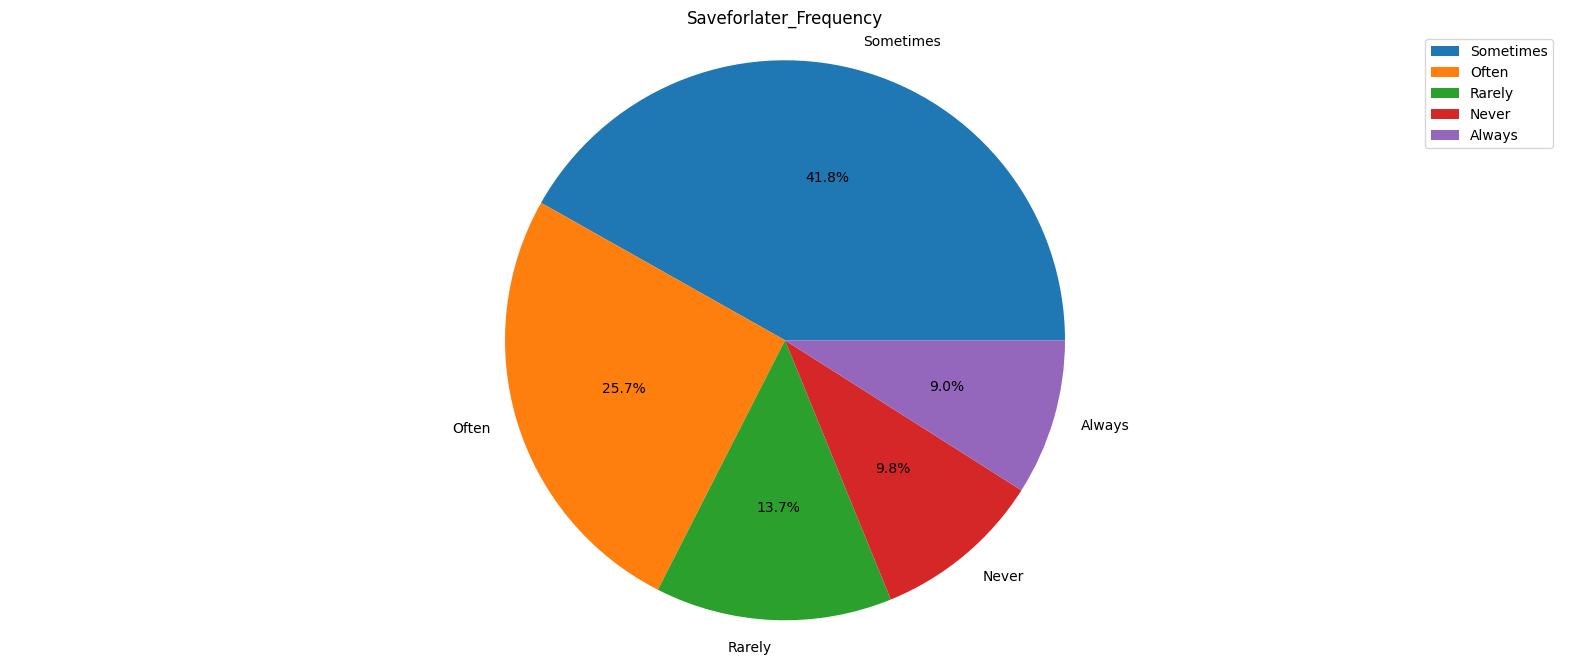

In [ ]:
counts_Saveforlater_Frequency= df['Saveforlater_Frequency'].value_counts()
plt.figure(figsize=(20, 8))
plt.pie(counts_Saveforlater_Frequency, labels=counts_Saveforlater_Frequency.index, autopct='%1.1f%%')
plt.title('Saveforlater_Frequency')
plt.axis('equal')
plt.legend()
plt.show()

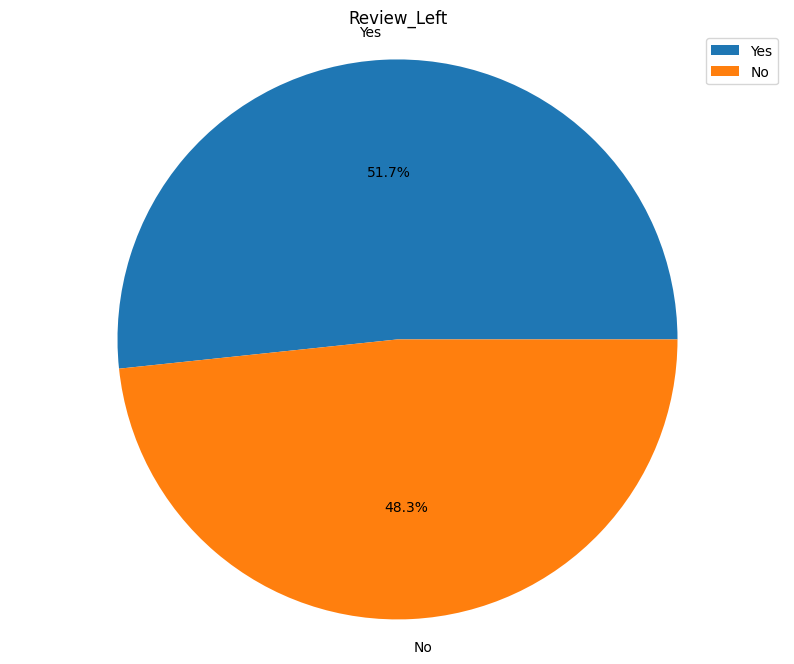

In [ ]:
counts_Review_Left= df['Review_Left'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Review_Left, labels=counts_Review_Left.index, autopct='%1.1f%%')
plt.title('Review_Left')
plt.axis('equal')
plt.legend()
plt.show()

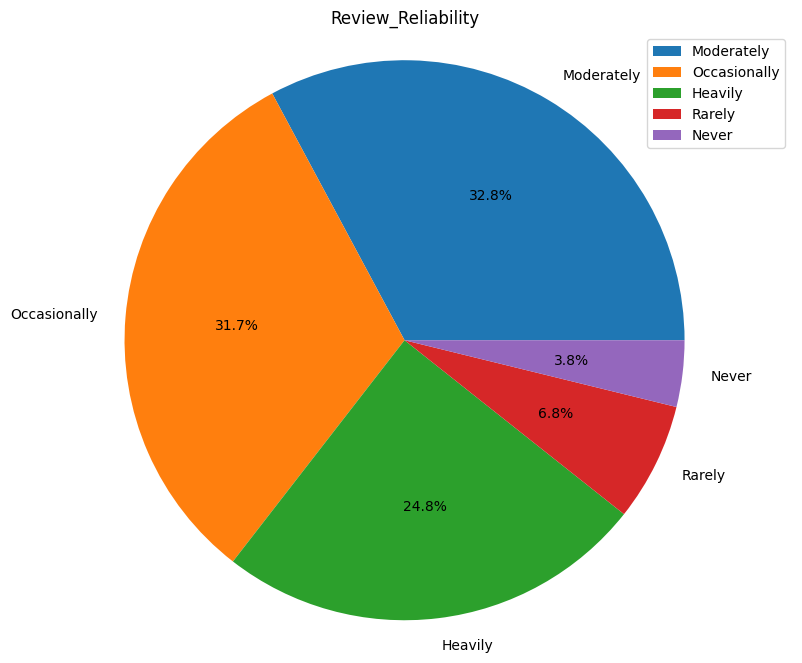

In [ ]:
counts_Review_Reliability= df['Review_Reliability'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Review_Reliability, labels=counts_Review_Reliability.index, autopct='%1.1f%%')
plt.title('Review_Reliability')
plt.axis('equal')
plt.legend()
plt.show()

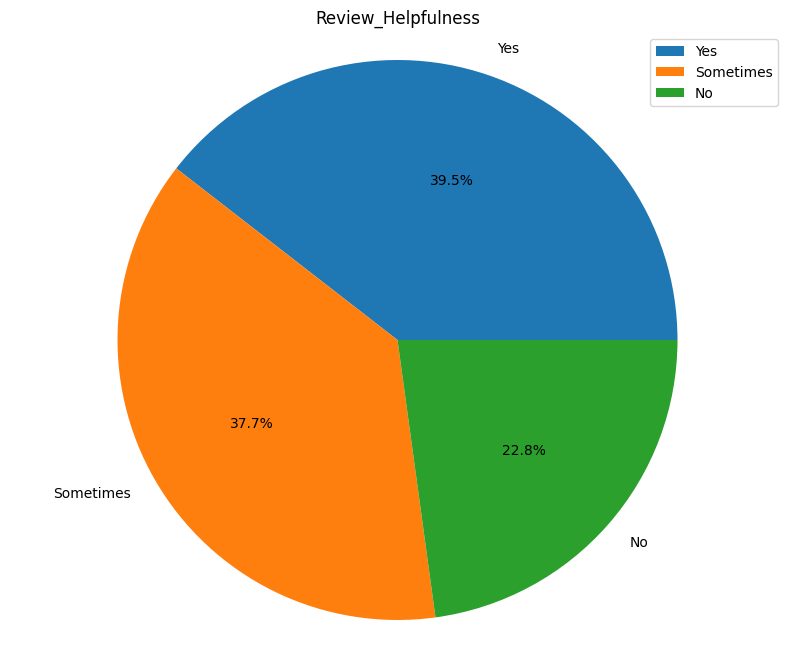

In [ ]:
counts_Review_Helpfulness= df['Review_Helpfulness'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Review_Helpfulness, labels=counts_Review_Helpfulness.index, autopct='%1.1f%%')
plt.title('Review_Helpfulness')
plt.axis('equal')
plt.legend()
plt.show()

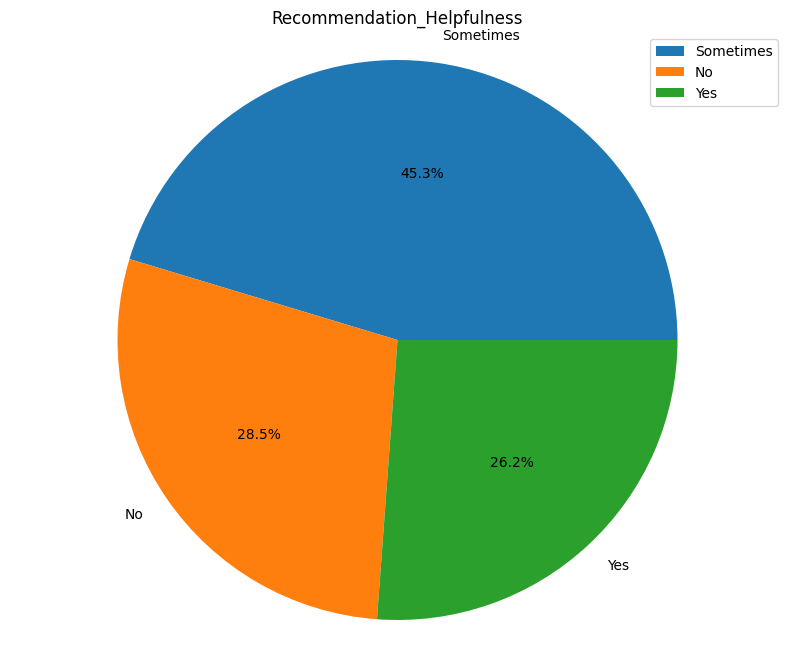

In [ ]:
counts_Recommendation_Helpfulness= df['Recommendation_Helpfulness'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(counts_Recommendation_Helpfulness, labels=counts_Recommendation_Helpfulness.index, autopct='%1.1f%%')
plt.title('Recommendation_Helpfulness')
plt.axis('equal')
plt.legend()
plt.show()

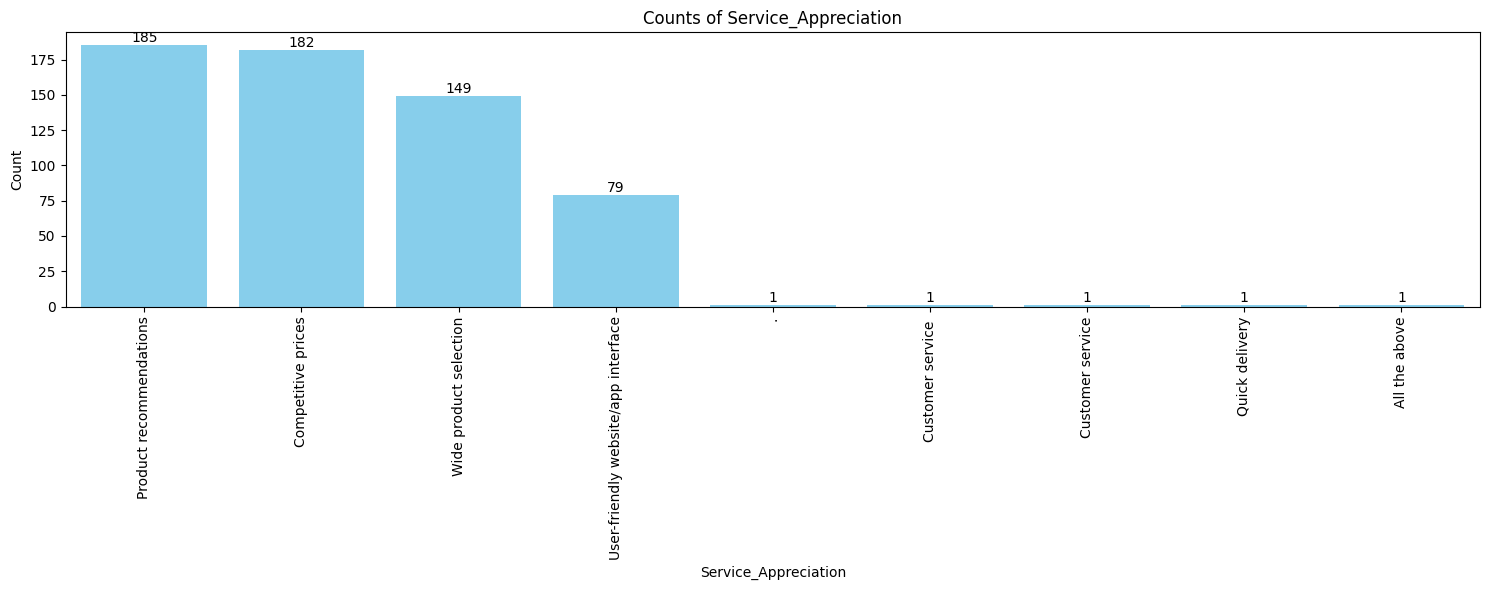

In [ ]:
counts_Service_Appreciation= df['Service_Appreciation'].value_counts()
plt.figure(figsize=(15, 6))
barplot = plt.bar(counts_Service_Appreciation.index, counts_Service_Appreciation, color='skyblue')
counts_Service_Appreciation.plot(kind='bar', color='skyblue')

plt.xlabel('Service_Appreciation')
plt.ylabel('Count')
plt.title('Counts of Service_Appreciation')

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<ipython-input-51-0f080b26c14e>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


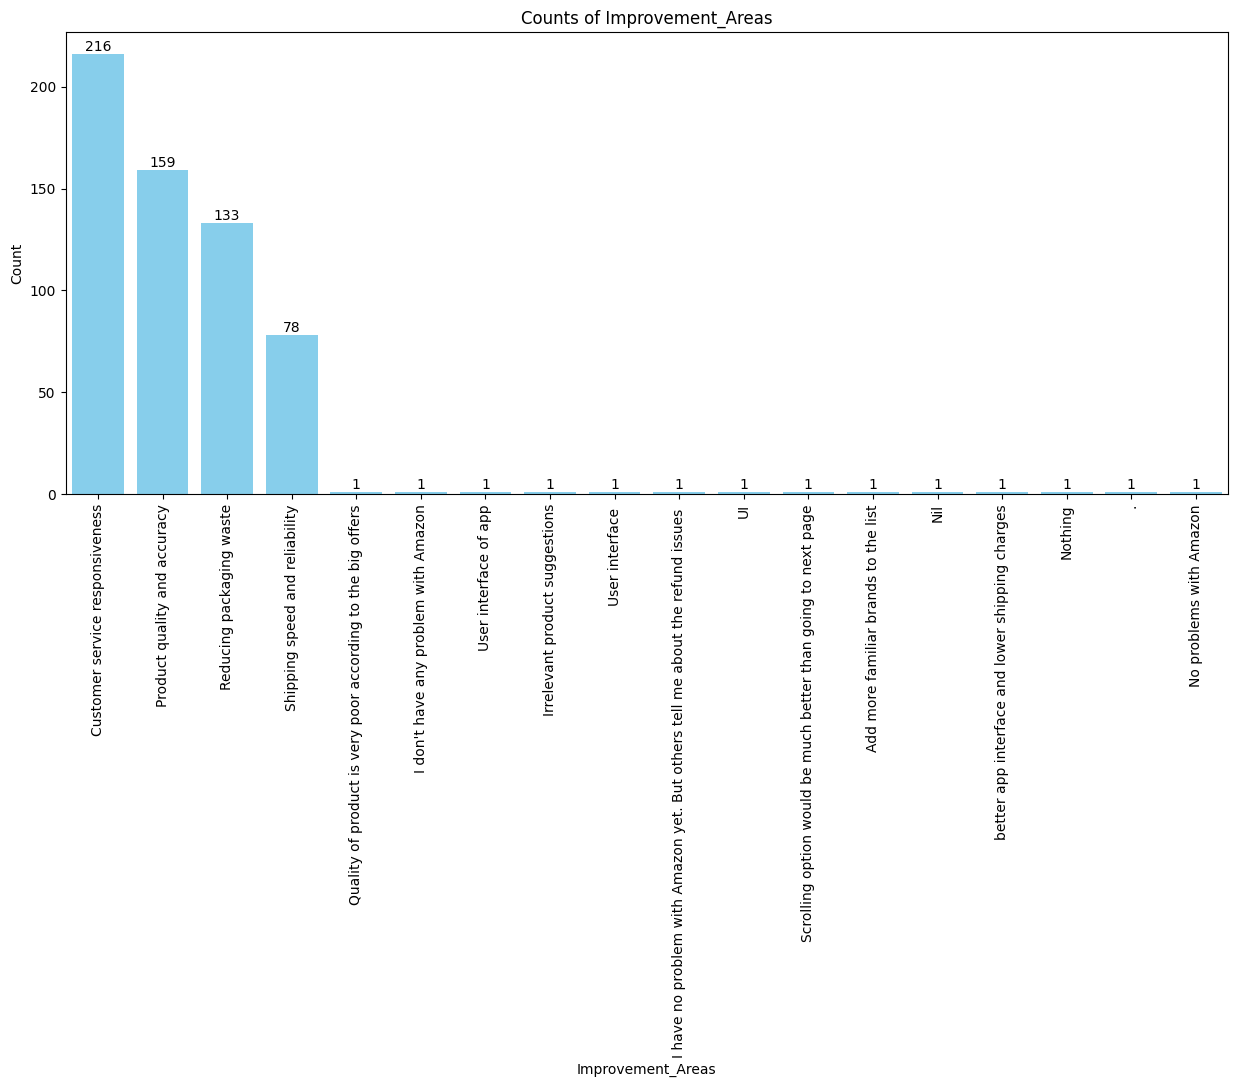

In [ ]:
counts_Improvement_Areas= df['Improvement_Areas'].value_counts()
plt.figure(figsize=(15, 6))
barplot = plt.bar(counts_Improvement_Areas.index, counts_Improvement_Areas, color='skyblue')
counts_Improvement_Areas.plot(kind='bar', color='skyblue')

plt.xlabel('Improvement_Areas')
plt.ylabel('Count')
plt.title('Counts of Improvement_Areas')

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

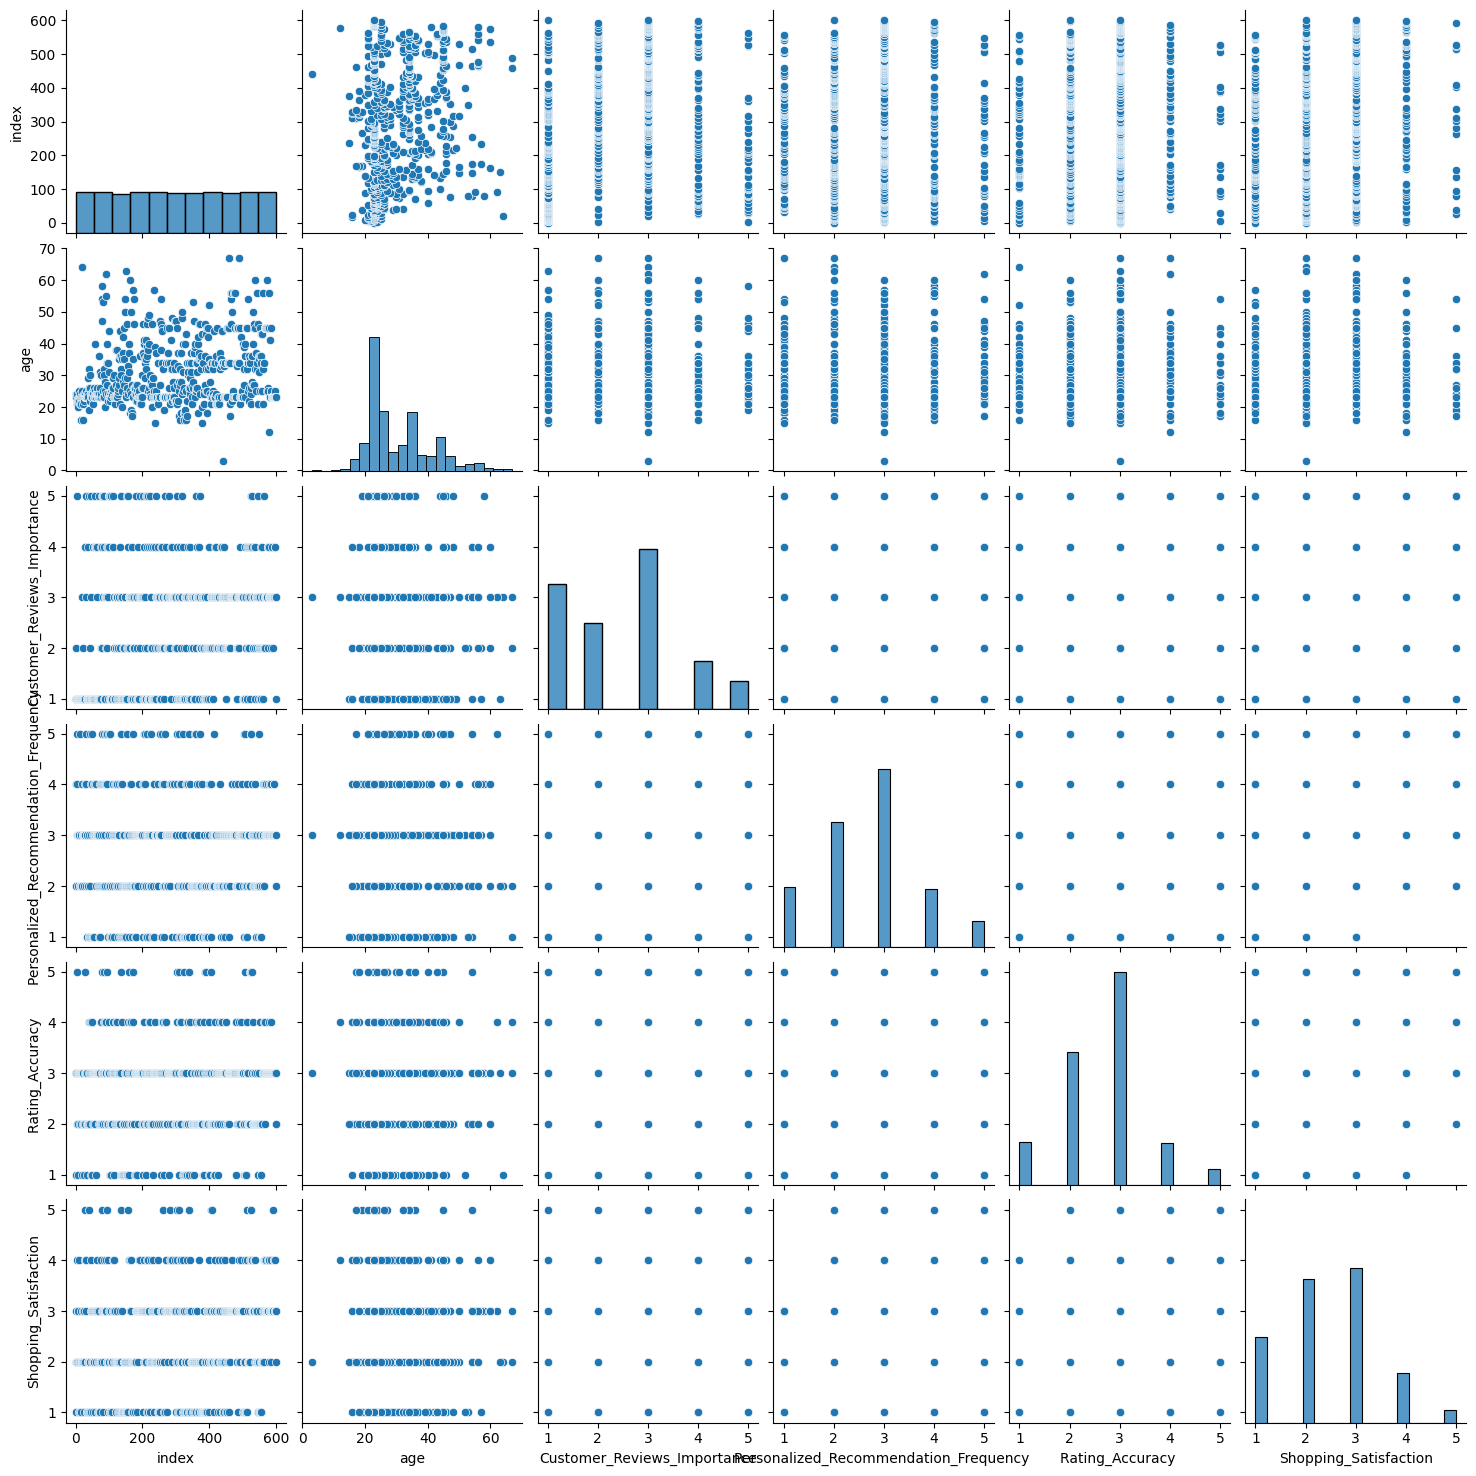

<Figure size 800x800 with 0 Axes>

In [ ]:
sns.pairplot(df)
plt.figure(figsize=(8,8))
plt.show()

*change data types for heatmap*

In [ ]:
df.columns

Index(['index', 'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Frequency ',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'Gender_Gr', 'Frequency_Gr', 'Main_Category',
       'Gr_Personalized_Recommendation_Frequency', 'Browsing_Frequency_Gr',
       'Add_to_Cart_Browsing_gr', 'Cart_Completion_Frequency_Gr',
       'Abandonment_Gr', 'Saveforlater_Frequency_Gr', 'Review_Helpfulness_gr',
       'Recommendation_Helpfulness_gr'],
      dtype='object')

In [ ]:
data=df
le=LabelEncoder()
lst=[ 'age',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Review_Left', 'Review_Reliability',
        'Personalized_Recommendation_Frequency ',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'Gender_Gr', 'Frequency_Gr', 'Main_Category',
       'Gr_Personalized_Recommendation_Frequency', 'Browsing_Frequency_Gr',
       'Add_to_Cart_Browsing_gr', 'Cart_Completion_Frequency_Gr',
       'Abandonment_Gr', 'Saveforlater_Frequency_Gr', 'Review_Helpfulness_gr',
       'Recommendation_Helpfulness_gr']
for i in lst:
  df[i]=le.fit_transform(df[i])

<ipython-input-54-37903b1ac483>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
<ipython-input-54-37903b1ac483>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
<ipython-input-54-37903b1ac483>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
df.head(5)

,index,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Frequency_Gr,Main_Category,Gr_Personalized_Recommendation_Frequency,Browsing_Frequency_Gr,Add_to_Cart_Browsing_gr,Cart_Completion_Frequency_Gr,Abandonment_Gr,Saveforlater_Frequency_Gr,Review_Helpfulness_gr,Recommendation_Helpfulness_gr
0,0,10,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,1,1,0,...,1,0,1,0,1,2,2,2,1,1
1,1,10,Female,Once a month,Clothing and Fashion,Yes,Few times a month,1,1,0,...,1,1,1,1,1,0,2,1,1,0
2,2,11,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,1,1,1,...,1,2,0,1,1,2,2,1,0,0
3,3,11,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,1,0,4,...,1,0,0,1,0,2,2,2,1,0
4,4,9,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,0,1,0,...,2,0,1,1,1,2,2,1,1,1


In [ ]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set a correlation threshold
threshold = 0.5  # Adjust as needed

# Find the indices of features with correlation higher than the threshold
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Avoid self-correlations and duplicates
seen_pairs = set()
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:  # Exclude self-correlations
        pair = tuple(sorted([feature1, feature2]))  # Sort to avoid duplicate pairs
        if pair not in seen_pairs:
            print(f"{numeric_df.columns[feature1]} and {numeric_df.columns[feature2]} are highly correlated.")
            seen_pairs.add(pair)


Recommendation_Helpfulness and Recommendation_Helpfulness_gr are highly correlated.
Rating_Accuracy  and Shopping_Satisfaction are highly correlated.
Add_to_Cart_Browsing_gr and Review_Helpfulness_gr are highly correlated.


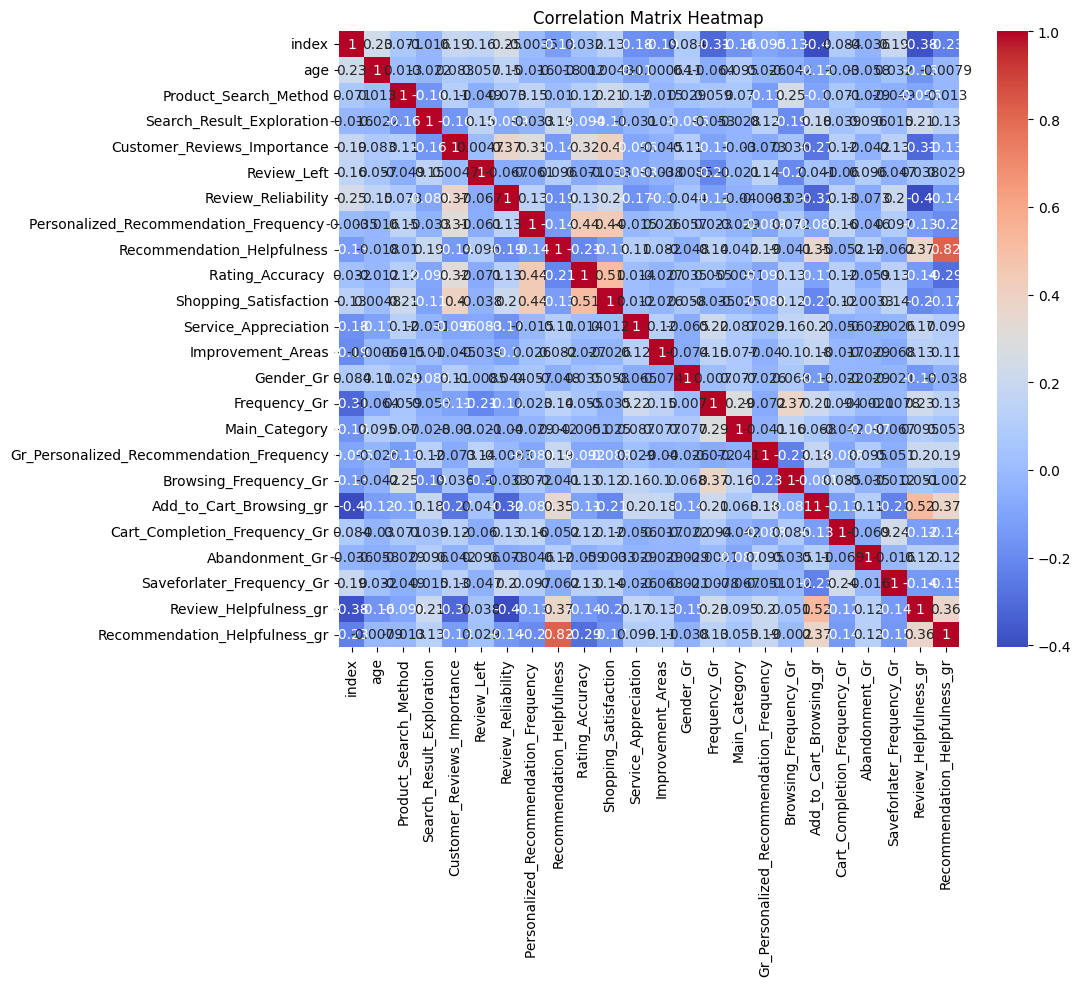

In [ ]:

correlation_matrix = numeric_df.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

**Feature selection**

x=Recommendation_Helpfulness

y='age', 'Gender','Purchase_Frequency', 'Purchase_Categories', 'Browsing_Frequency','Product_Search_Method', 'Customer_Reviews_Importance','Cart_Abandonment_Factors', 'Saveforlater_Frequency','Recommendation_Helpfulness',"Service_Appreciation","Improvement_Areas"

IQR

In [ ]:
q1= df['age'].quantile(0.25)
q3= df['age'].quantile(0.75)
iqr=q3-q1
print(q3)
print(q1)
print(iqr)


23.0
10.0
13.0


In [3]:
df=pd.read_excel('/content/drive/MyDrive/data1111.xlsx')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Selecting relevant features and target variable
features = df[['Add_to_Cart_Browsing_gr', 'Personalized_Recommendation_Frequency',
               'Product_Search_Method', 'Browsing_Frequency_Gr', 'Customer_Reviews_Importance']]
target = df['Abandonment_Gr']

# Encoding categorical variables
encoder = LabelEncoder()
encoded_features = features.apply(lambda col: encoder.fit_transform(col) if col.dtype == 'object' else col)

# Encoding the target variable
target_encoded = encoder.fit_transform(target)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target_encoded,
                                                    test_size=0.3, random_state=42)

# Displaying the first few rows of the prepared data
X_train.head(), y_train[:5]


(     Add_to_Cart_Browsing_gr  Personalized_Recommendation_Frequency  \
 108                        1                                      1   
 272                        0                                      1   
 599                        0                                      1   
 479                        0                                      1   
 436                        0                                      1   
 
      Product_Search_Method  Browsing_Frequency_Gr  Customer_Reviews_Importance  
 108                      1                      0                            1  
 272                      1                      2                            2  
 599                      1                      0                            3  
 479                      2                      1                            3  
 436                      2                      1                            4  ,
 array([1, 2, 2, 0, 1]))

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.classes_)

accuracy, conf_matrix, report


(0.45,
 array([[30,  1, 33],
        [ 9,  2,  4],
        [49,  3, 49]]),
 '                  precision    recall  f1-score   support\n\nDecision-related       0.34      0.47      0.39        64\n           Other       0.33      0.13      0.19        15\n   Price-related       0.57      0.49      0.52       101\n\n        accuracy                           0.45       180\n       macro avg       0.41      0.36      0.37       180\n    weighted avg       0.47      0.45      0.45       180\n')

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=encoder.classes_)

accuracy_rf, conf_matrix_rf, report_rf


(0.4777777777777778,
 array([[25,  0, 39],
        [ 6,  1,  8],
        [39,  2, 60]]),
 '                  precision    recall  f1-score   support\n\nDecision-related       0.36      0.39      0.37        64\n           Other       0.33      0.07      0.11        15\n   Price-related       0.56      0.59      0.58       101\n\n        accuracy                           0.48       180\n       macro avg       0.42      0.35      0.35       180\n    weighted avg       0.47      0.48      0.47       180\n')